## Project- Part B:Customer Churn Prediction
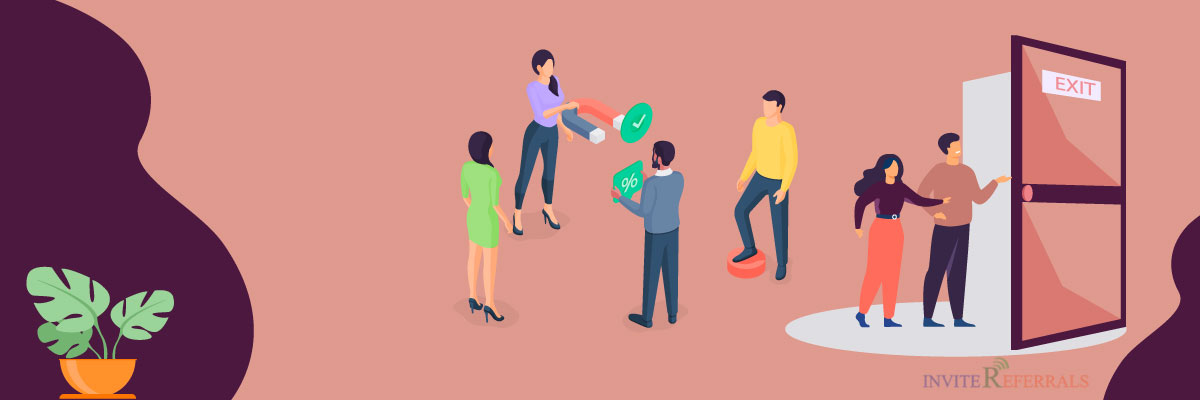

**1. Overview**  
Customer churn, or customer attrition, refers to when a customer ceases their relationship
with a company or service provider. In today's highly competitive business environment,
retaining customers is a critical factor for long-term success. Predicting customer churn can
help organizations take proactive steps to retain customers, thus minimizing revenue loss.
This project aims to build a machine learning model that can predict whether a customer will
churn based on their demographic, account, and service-related data.

**2. Problem Statement**  
The goal of this project is to develop a classification model that predicts whether a customer
will churn. Using demographic data (such as gender, senior citizen status, and tenure), along
with information about the services they use (such as internet service, phone service, and
online security), we will attempt to build a model that helps the company identify customers
who are at a high risk of churning.
By predicting customer churn, the company can proactively design retention strategies to
keep these customers, thereby improving customer satisfaction and reducing financial loss.

**3. Dataset Information**  
**Dataset: [Customer_data](https://docs.google.com/spreadsheets/d/1rnBO9F9xdSUY-WpeOJilMxMRZT-hwwWq6O98OHreY0k/edit?usp=sharing)**  
The dataset information can be found in this doc **[Data Information](https://docs.google.com/document/d/1V-L3EdEnEEiYHhxppRY_CkPRbJ77ELYc/edit?rtpof=true&sd=true&tab=t.0)**.  

**4. Deliverables**
- A data exploration and preprocessing notebook or report that analyzes the dataset, handles missing values, and prepares the data for modeling.
- A machine learning model capable of predicting customer churn.
- An evaluation of model performance using appropriate metrics (such as accuracy, precision, recall, F1 score, etc.).
- Get the predictions for the new data.

In [81]:
# Import Liabrary
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import joblib
import warnings
warnings.filterwarnings('ignore')

In [82]:
# Load Dataset
data_url='https://docs.google.com/spreadsheets/d/1rnBO9F9xdSUY-WpeOJilMxMRZT-hwwWq6O98OHreY0k/export?format=csv&gid=1602415961'
df=pd.read_csv(data_url)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [83]:
# Dataframe structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [84]:
# summary of statistics
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [85]:
# Duplicate & missing values
print("Duplicate Values:",df.duplicated().sum())
print("Missing Values:")
df.isnull().sum()

Duplicate Values: 0
Missing Values:


customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

- In total charges 11 values is missing.

In [86]:
# checking the missing rows
df[pd.isnull(df['TotalCharges'])]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


- The tenure column is 0 for these entries but monthly columns is not empty. let's see if there are any other 0 values in tenure.

In [87]:
# Tenure
df[df['tenure']==0].index

Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

In [88]:
# Total charges
df[pd.isnull(df['TotalCharges'])].index

Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

- There are no additional missing values in the Tenure column. Let's delete the rows with missing values in Tenure columns since there are only 11 rows and deleting them will not affect the data.

In [89]:
# selecting rows where tenure is not 0
df1=df[df['tenure']!=0]
df1=df1.drop('customerID',axis=1)

In [90]:
# Print all unique values of the object data types in the dataset
for cols in df1.select_dtypes(include='object'):
    print(cols,'\n-------')
    print(df[cols].unique())
    print('x'*30)

gender 
-------
['Female' 'Male']
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Partner 
-------
['Yes' 'No']
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Dependents 
-------
['No' 'Yes']
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
PhoneService 
-------
['No' 'Yes']
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
MultipleLines 
-------
['No phone service' 'No' 'Yes']
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
InternetService 
-------
['DSL' 'Fiber optic' 'No']
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
OnlineSecurity 
-------
['No' 'Yes' 'No internet service']
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
OnlineBackup 
-------
['Yes' 'No' 'No internet service']
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
DeviceProtection 
-------
['No' 'Yes' 'No internet service']
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
TechSupport 
-------
['No' 'Yes' 'No internet service']
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
StreamingTV 
-------
['No' 'Yes' 'No internet service']
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
StreamingMovies 
-------
['No' 'Yes' 'No internet service']
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Contract 
-------
['Month-to-month' 'One

#### Data Visualization

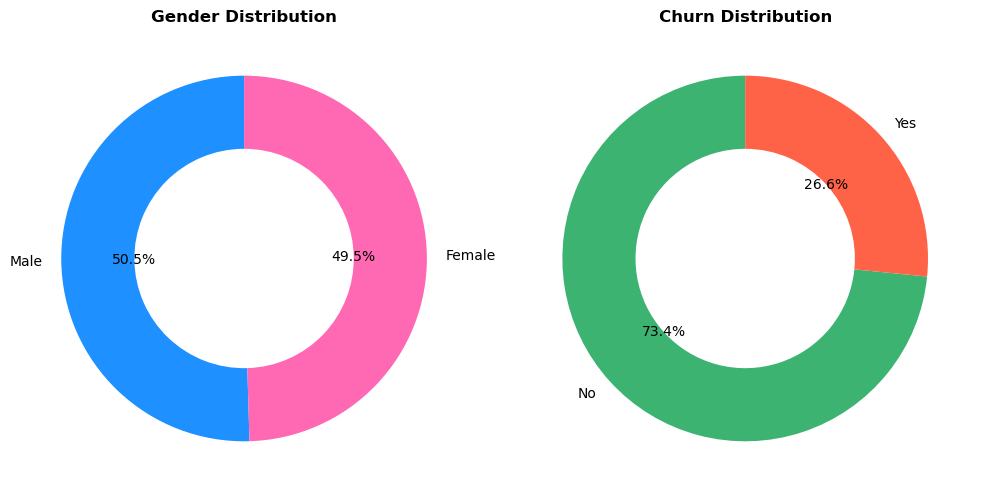

In [91]:
label=['gender','Churn']
colors=[['dodgerblue','hotpink'],['mediumseagreen','tomato']]
titles = ['Gender Distribution', 'Churn Distribution']
#plot
plt.figure(figsize=(10,5))
for i, col in enumerate(label):
    plt.subplot(1,2,i+1)
    counts=df1[col].value_counts()
    plt.pie(counts,labels=counts.index,autopct='%1.1f%%',startangle=90,
           wedgeprops=dict(width=0.4),colors=colors[i])
    plt.title(titles[i],fontweight='bold')
plt.tight_layout()
plt.show()

In [92]:
# count churn customer
churn_gender=df1.groupby(['gender','Churn']).size().unstack()
churn_gender

Churn,No,Yes
gender,,
Female,2544,939
Male,2619,930


- Female and male customers churn at almost the same rate - only a 9 customer difference.

In [93]:
# Count all three variables together
churn_gender_senior = df1.groupby(['gender', 'SeniorCitizen', 'Churn']).size().unstack()
churn_gender_senior

Churn                   No  Yes
gender SeniorCitizen           
Female 0              2216  699
       1               328  240
Male   0              2281  694
       1               338  236

- 0 is Non SeniorCitizen.
- 1 is SeniorCitizen.
- In Female gender SeniorCitizen is 240 and 236 is male SeniorCitizen.	

In [94]:
# seperating churn customer
churn_df=df1.loc[df1['Churn']=='Yes']
churn_df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,1869.000000,1869.000000,1869.000000,1869.000000
mean,0.254682,17.979133,74.441332,1531.796094
std,0.435799,19.531123,24.666053,1890.822994
min,0.000000,1.000000,18.850000,18.850000
25%,0.000000,2.000000,56.150000,134.500000
50%,0.000000,10.000000,79.650000,703.550000
75%,1.000000,29.000000,94.200000,2331.300000
max,1.000000,72.000000,118.350000,8684.800000


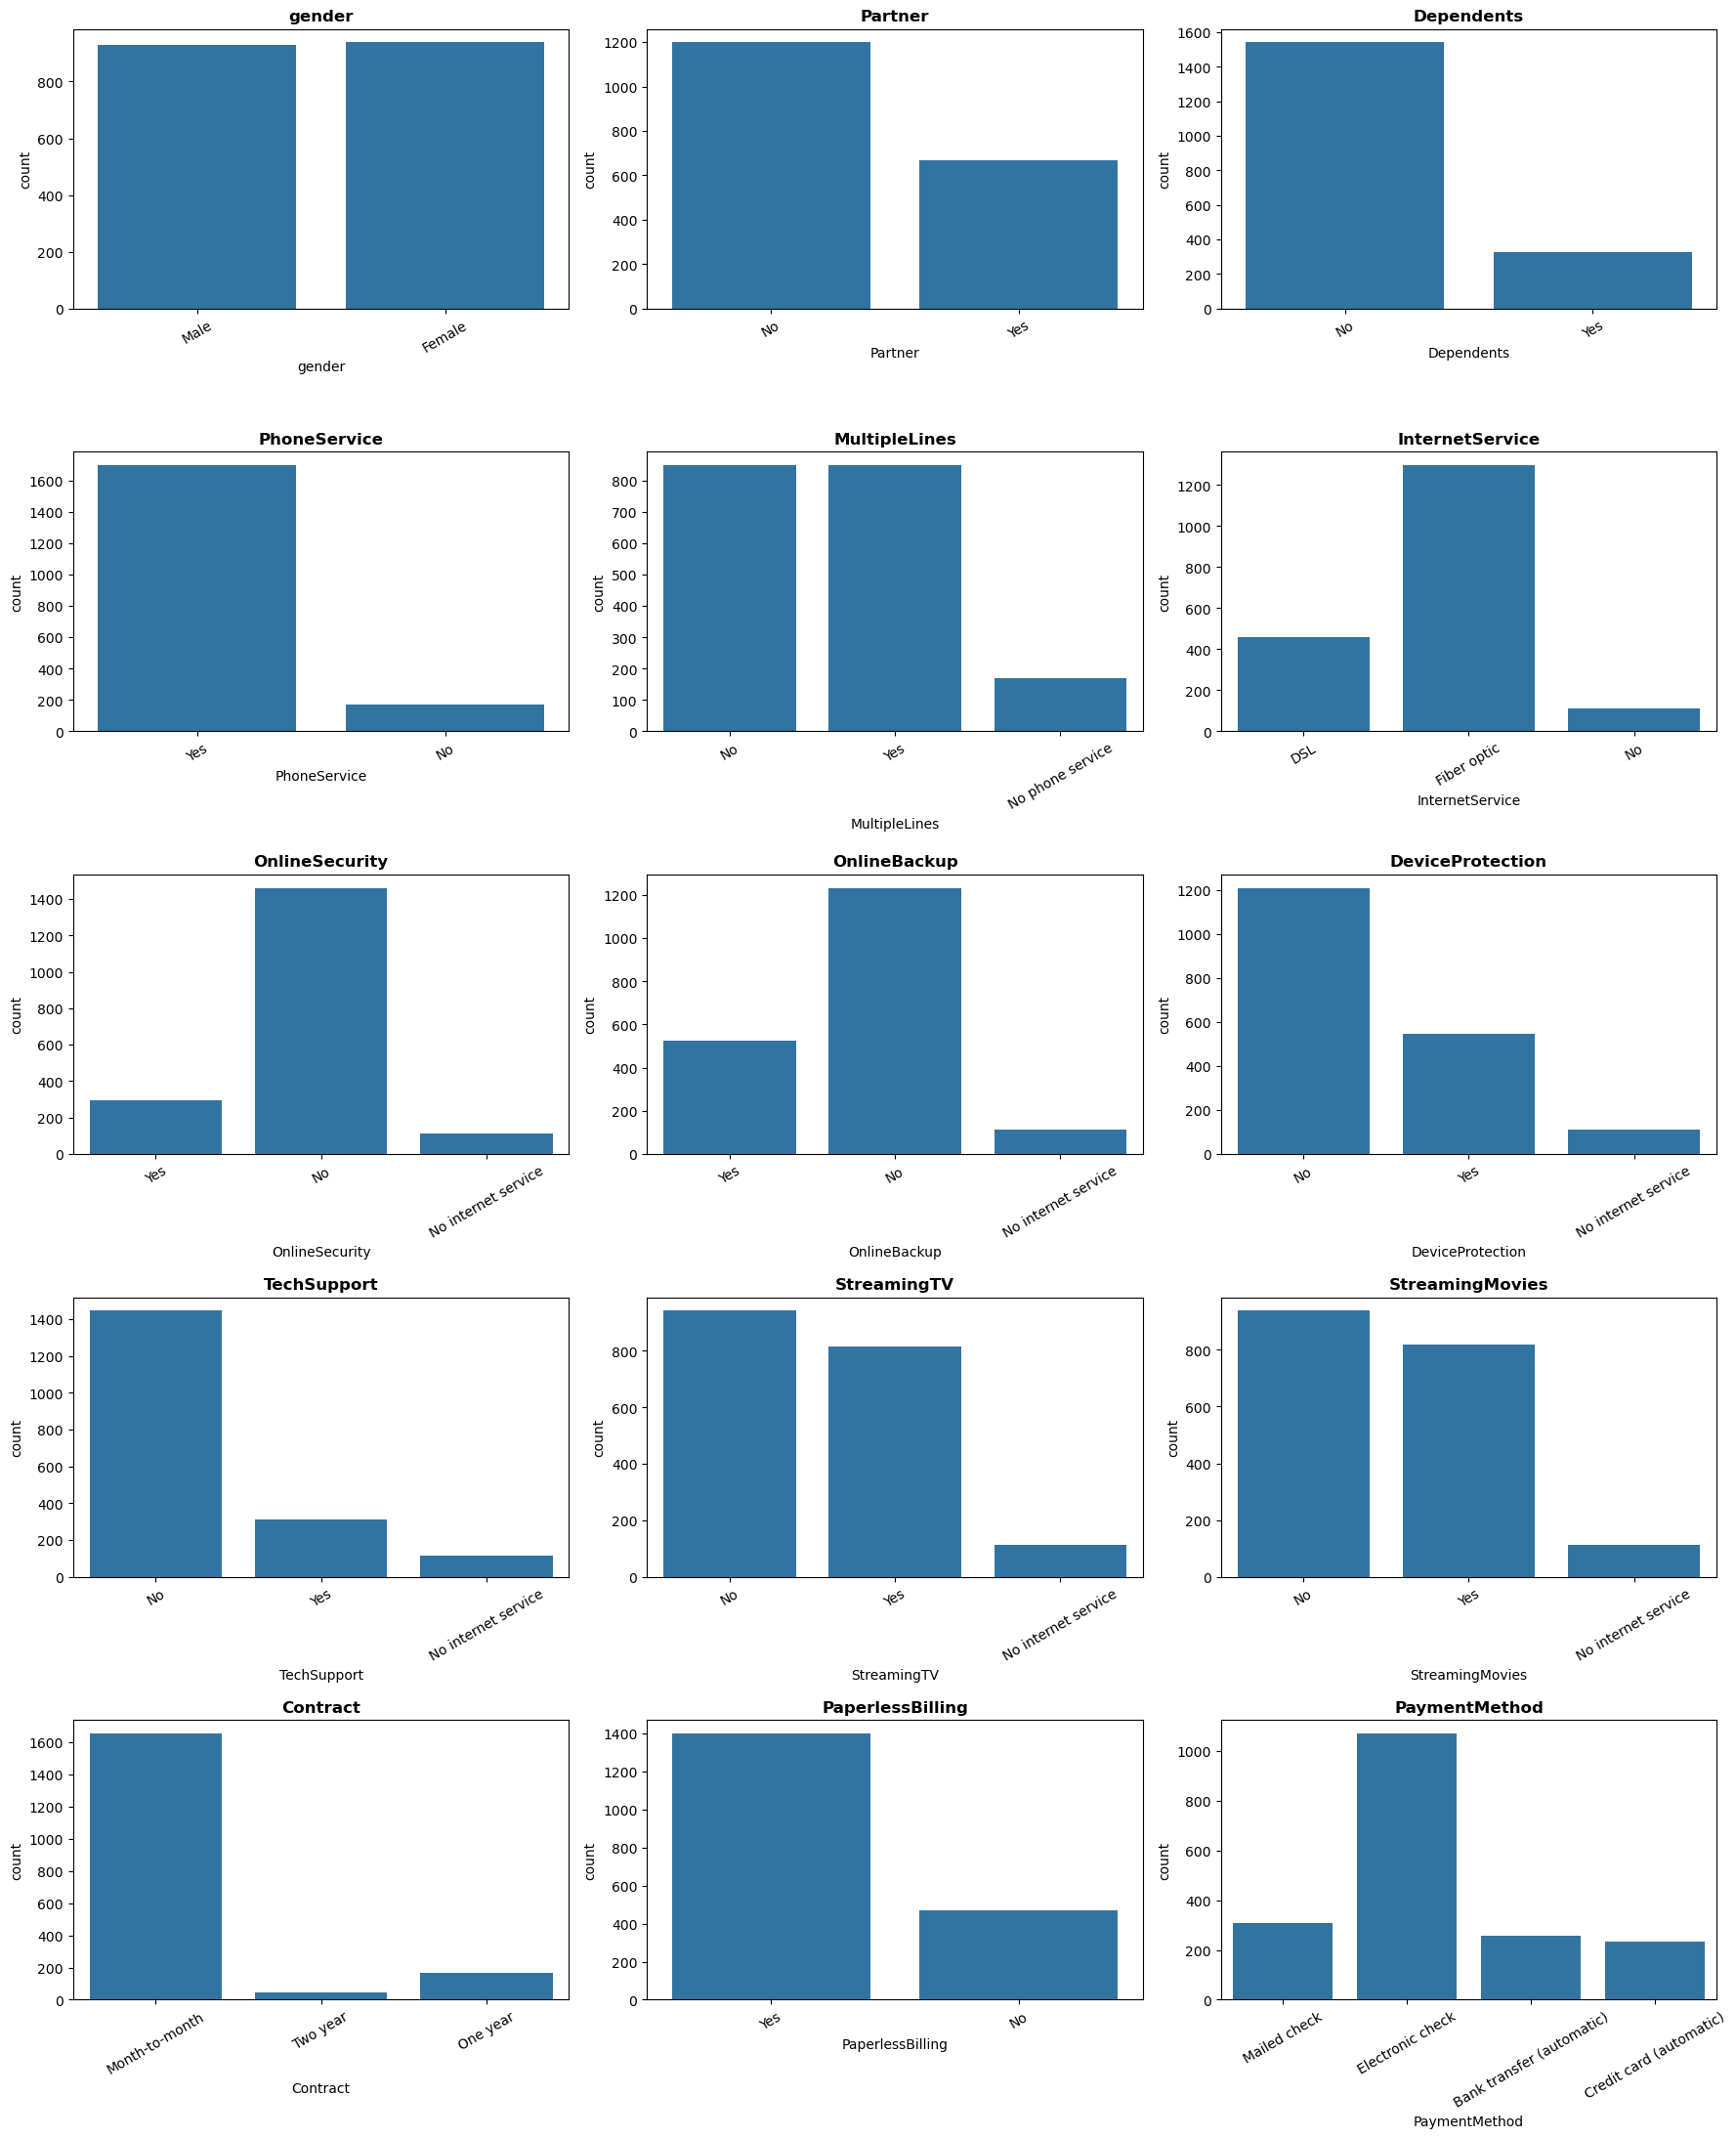

In [95]:
# Displaying only churn customer (Yes)
cat_churn = churn_df.select_dtypes(include='object').columns.drop('Churn')

plt.figure(figsize=(18,5*((len(cat_churn)+2)//3)))
for i, col in enumerate(cat_churn,1):
    plt.subplot((len(cat_churn)//3)+1,3,i)
    sns.countplot(data=churn_df,x=col)
    plt.title(f'{col}',fontweight='bold')
    plt.xticks(rotation=30)

plt.tight_layout()
plt.show()

The count plots represent only **customers who churned (Churn = Yes)**.
- Customers without a **partner and dependents** have a higher churn ratio.
- **Online security, online backup, and device protection** marked as "No" show the highest churn counts.
- **Tech support, streaming TV, and streaming movies** with "No" also have high churn.
- Customers with a **month-to-month contract** churn the most.
- **Paperless billing = Yes** is associated with higher churn.
- **Electronic check** as the payment method has the highest churn rate.

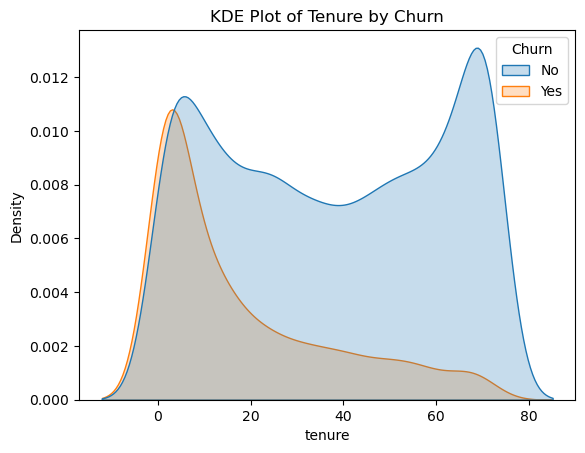

In [96]:
# create kde plot
sns.kdeplot(x='tenure',hue='Churn',fill=True,data=df1)
plt.title("KDE Plot of Tenure by Churn")
plt.show()

- The orange curve shows that customers who churned have a high density at a very low tenure, specifically near 0.

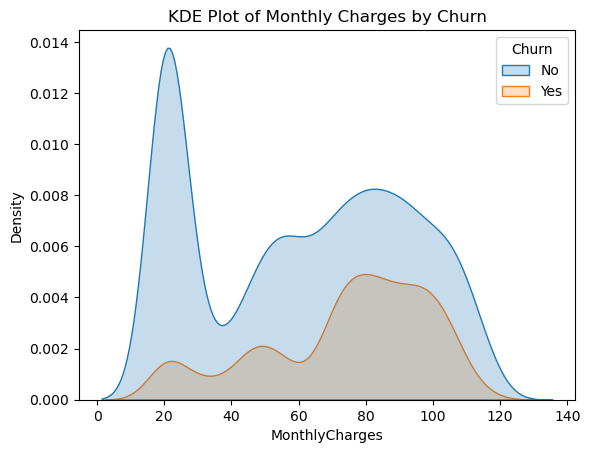

In [97]:
# create kde plot
sns.kdeplot(x='MonthlyCharges',hue='Churn',fill=True,data=df1)
plt.title("KDE Plot of Monthly Charges by Churn")
plt.show()

- Customers with higher monthly charges (around 70-100) are more likely to churn.

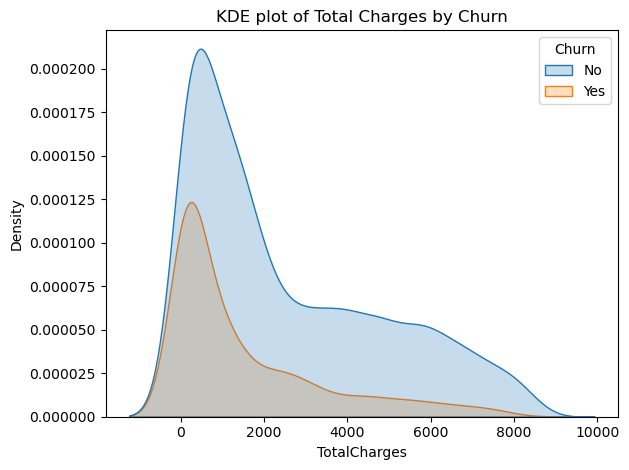

In [98]:
# kde plot total charges
sns.kdeplot(x='TotalCharges',hue='Churn',fill=True,data=df1)
plt.title('KDE plot of Total Charges by Churn')
plt.tight_layout()
plt.show()

- Most customers who want churned had total charges below 2000.

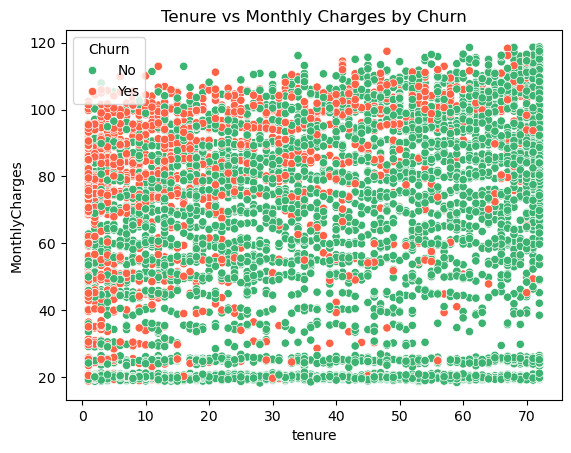

In [99]:
# Displaing scatterplot
sns.scatterplot(data=df1, x='tenure', y='MonthlyCharges', hue='Churn', palette=['mediumseagreen','tomato'])
plt.title('Tenure vs Monthly Charges by Churn')
plt.show()

- The orange dot shows that customers who churned have a high monthly charges at a very low tenure. 

In [100]:
# Convert categorical variable
binary_cols=['gender','Partner','Dependents','PhoneService','PaperlessBilling','Churn'] # These Variale holding two category
multi_cols=['MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection',
           'TechSupport','StreamingTV','StreamingMovies','Contract','PaymentMethod']

In [101]:
# copy dataframe
df2=df1.copy()
# lebel encoding for binary column
le=LabelEncoder()
for col in binary_cols:
    df2[col]=le.fit_transform(df2[col])

# One hot encoding for multi category columns
df2=pd.get_dummies(df2,columns=multi_cols,drop_first=True)
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,False,False,False,False,False,False,False,False,True,False
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,False,False,False,False,False,True,False,False,False,True
2,1,0,0,0,2,1,1,53.85,108.15,1,...,False,False,False,False,False,False,False,False,False,True
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,True,False,False,False,False,True,False,False,False,False
4,0,0,0,0,2,1,1,70.70,151.65,1,...,False,False,False,False,False,False,False,False,True,False


In [102]:
# Scaling the numeric variable
scaler=StandardScaler()
scaled_cols=['tenure','MonthlyCharges','TotalCharges']
df2[scaled_cols]=scaler.fit_transform(df2[scaled_cols])

In [103]:
# split the data into training and testing set
x=df2.drop('Churn',axis=1)
y=df2['Churn']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)
# Check the new split sizes
print("Training set size:", x_train.shape)
print("Test set size:", x_test.shape)

Training set size: (5625, 30)
Test set size: (1407, 30)


In [104]:
# Define models with some parameters
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000), 
    "Random Forest Classifier": RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42),
    "Decision Tree Classifier": DecisionTreeClassifier(max_depth=5, random_state=42),
    "KNeighbors Classifier": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(kernel='rbf', C=1.0,probability=True),  # rbf for non liner data
    "Bagging Classifier": BaggingClassifier(n_estimators=50, random_state=42),
    "Ada Boost Classifier": AdaBoostClassifier(n_estimators=100, learning_rate=0.5, random_state=42)
}

In [105]:
# To store accuracy results
results = []
for name, model in models.items():
    print(f"\n{name}")
    print("-"*len(name))
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)

    # Accuracy
    acc=accuracy_score(y_test,y_pred)
    results.append({"Model":name,"Accuracy":acc})
    print(f"Accuracy: {acc:.2f}")

    # Confusion Matrix
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    
    # Classification Report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))


Logistic Regression
-------------------
Accuracy: 0.80
Confusion Matrix:
[[917 116]
 [159 215]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.65      0.57      0.61       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407


Random Forest Classifier
------------------------
Accuracy: 0.79
Confusion Matrix:
[[924 109]
 [187 187]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.63      0.50      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407


Decision Tree Classifier
------------------------
Accuracy: 0.78
Confusion Matrix:
[[872 161]
 

In [106]:
# Convert results to DataFrame
results_df=pd.DataFrame(results)
print("Summary of Accuracies:")
results_df.sort_values(by="Accuracy",ascending=False)

Summary of Accuracies:


,Model,Accuracy
0,Logistic Regression,0.804549
6,Ada Boost Classifier,0.795309
4,SVM,0.793177
1,Random Forest Classifier,0.789623
2,Decision Tree Classifier,0.778252
5,Bagging Classifier,0.774698
3,KNeighbors Classifier,0.761905


- **Class 0 (Non-churn):** Much larger in number ➡️ model learns its pattern well ➡️ high accuracy, high recall.
- **Class 1 (Churn):** Much smaller in number ➡️ model sees fewer examples ➡️ misses many churn cases, giving low recall and F1-score for class 1.

In [107]:
# churn class is imblance then apply SMOTE
from imblearn.over_sampling import SMOTE
from collections import Counter

In [108]:
# Apply SMOTE to training data
smote=SMOTE(random_state=42)
x_train_smote,y_train_smote=smote.fit_resample(x_train,y_train)

In [109]:
print("Before SMOTE:", Counter(y_train))
print("After SMOTE:", Counter(y_train_smote))

Before SMOTE: Counter({0: 4130, 1: 1495})
After SMOTE: Counter({0: 4130, 1: 4130})


In [110]:
s_results=[]
for name, model in models.items():
    print(f"\n{name}")
    print("-"*len(name))
    model.fit(x_train_smote,y_train_smote)
    y_pred=model.predict(x_test)

    # Accuracy
    acc=accuracy_score(y_test,y_pred)
    s_results.append({"Model":name,"Accuracy":acc})
    print(f"Accuracy: {acc:.2f}")

    # Confusion Matrix
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    
    # Classification Report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))


Logistic Regression
-------------------
Accuracy: 0.73
Confusion Matrix:
[[766 267]
 [113 261]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.74      0.80      1033
           1       0.49      0.70      0.58       374

    accuracy                           0.73      1407
   macro avg       0.68      0.72      0.69      1407
weighted avg       0.77      0.73      0.74      1407


Random Forest Classifier
------------------------
Accuracy: 0.75
Confusion Matrix:
[[781 252]
 [ 94 280]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.76      0.82      1033
           1       0.53      0.75      0.62       374

    accuracy                           0.75      1407
   macro avg       0.71      0.75      0.72      1407
weighted avg       0.80      0.75      0.77      1407


Decision Tree Classifier
------------------------
Accuracy: 0.70
Confusion Matrix:
[[689 344]
 

In [111]:
# convert result to dataframe
smote_result=pd.DataFrame(s_results)
print("Summary of Accuracies:")
smote_result=smote_result.sort_values(by="Accuracy",ascending=False)
smote_result

Summary of Accuracies:


,Model,Accuracy
5,Bagging Classifier,0.761194
1,Random Forest Classifier,0.754087
4,SVM,0.739872
6,Ada Boost Classifier,0.733475
0,Logistic Regression,0.729922
3,KNeighbors Classifier,0.714286
2,Decision Tree Classifier,0.702914


- SMOTE improved recall for churn in all models.
- Accuracy fell slightly because the models now predict churn more often, leading to more false positives.

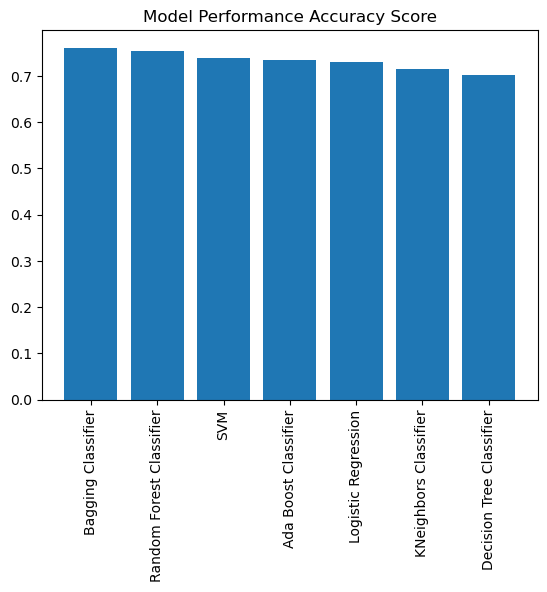

In [112]:
# Display accuracy
plt.bar(smote_result['Model'],smote_result['Accuracy'])
plt.title('Model Performance Accuracy Score')
plt.xticks(rotation=90)
plt.show()

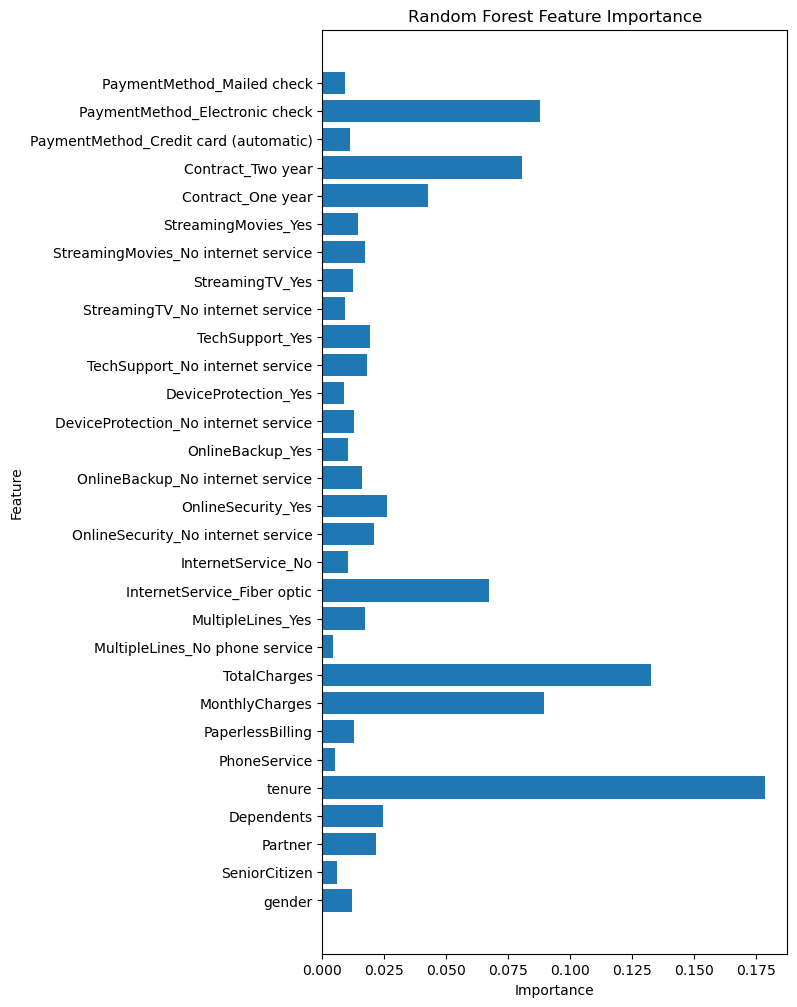

In [113]:
rf_model=models['Random Forest Classifier']
plt.figure(figsize=(6,12))
plt.barh(x_train_smote.columns, rf_model.feature_importances_)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Random Forest Feature Importance")
plt.show()

#### predictions for the new data

In [119]:
def predict_new_customer(models, reference_columns, df_train):
    """
    prediction asking numeric first, then boolean columns.
    
    Args:
        models (dict): trained models
        reference_columns (list): columns used in training
        df_train (DataFrame): training dataframe to detect column types
    """
    new_data = {}
    print("Enter values for the new customer:")

    # Split numeric and boolean columns
    numeric_cols = df_train.select_dtypes(include=['int64','float64']).columns.drop('Churn', errors='ignore')
    bool_cols = df_train.select_dtypes(include=['bool']).columns

    # 1. Ask numeric columns
    for col in numeric_cols:
        val = input(f"{col} (numeric): ")
        try:
            val = float(val)
            if val.is_integer():
                val = int(val)
        except:
            print("Invalid input, setting 0 by default")
            val = 0
        new_data[col] = [val]

    # 2. Ask boolean columns
    for col in bool_cols:
        val = input(f"{col} (True/False): ")
        if val.lower() == 'true':
            val = True
        else:
            val = False
        new_data[col] = [val]

    # Convert to DataFrame
    new_customer = pd.DataFrame(new_data)

    # Predict for all models
    results = []
    for name, model in models.items():
        pred_class = model.predict(new_customer)[0]
        if hasattr(model, "predict_proba"):
            pred_prob = model.predict_proba(new_customer)[:,1][0]
        else:
            pred_prob = "N/A"
        results.append({
            "Model": name,
            "Predicted Class": pred_class,
            "Churn Probability": pred_prob
        })

    return pd.DataFrame(results)

In [120]:
predictions = predict_new_customer(models, x_train_smote.columns, x_train_smote)
print(predictions)

Enter values for the new customer:


gender (numeric):  1
SeniorCitizen (numeric):  0
Partner (numeric):  0
Dependents (numeric):  1
tenure (numeric):  30
PhoneService (numeric):  1
PaperlessBilling (numeric):  0
MonthlyCharges (numeric):  100
TotalCharges (numeric):  400
MultipleLines_No phone service (True/False):  False
MultipleLines_Yes (True/False):  True
InternetService_Fiber optic (True/False):  True
InternetService_No (True/False):  False
OnlineSecurity_No internet service (True/False):  True
OnlineSecurity_Yes (True/False):  False
OnlineBackup_No internet service (True/False):  False
OnlineBackup_Yes (True/False):  True
DeviceProtection_No internet service (True/False):  False
DeviceProtection_Yes (True/False):  True
TechSupport_No internet service (True/False):  False
TechSupport_Yes (True/False):  True
StreamingTV_No internet service (True/False):  False
StreamingTV_Yes (True/False):  True
StreamingMovies_No internet service (True/False):  False
StreamingMovies_Yes (True/False):  True
Contract_One year (True/Fa

                      Model  Predicted Class  Churn Probability
0       Logistic Regression                0      8.335822e-262
1  Random Forest Classifier                0       3.327895e-01
2  Decision Tree Classifier                1       5.336788e-01
3     KNeighbors Classifier                0       2.000000e-01
4                       SVM                0       1.808664e-01
5        Bagging Classifier                0       5.000000e-01
6      Ada Boost Classifier                0       3.670492e-01


- Most of the model predicted 0 class
- Only decision tree predicted class 1 because probability > 50%. 

#### Thank You